# Prétraitement et modélisation

## Analyse exploiratoire et prétraitement

### Import des bibliothèques

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Import des jeu de données d'entrainement et de test

In [2]:
df_train = pd.read_csv('data/application_train.csv')
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df_test = pd.read_csv('data/application_test.csv')
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Analyse exploratoire

#### Analyse des jeux de données

1. Informations personnelles et démographiques

Ces colonnes contiennent les informations de base sur les clients et leur situation démographique :
- **`CODE_GENDER`** : Genre du client
- **`FLAG_OWN_CAR`** : Indicateur de possession d'une voiture
- **`FLAG_OWN_REALTY`** : Indicateur de possession de biens immobiliers
- **`CNT_CHILDREN`** : Nombre d'enfants du client
- **`AMT_INCOME_TOTAL`** : Revenu total du client
- **Autres** : Colonnes indiquant l'état civil, le niveau d'éducation, la profession, et la durée d'emploi peuvent aussi être présentes.

Ces informations permettent de catégoriser les clients et d'identifier des tendances démographiques ou socio-économiques dans les comportements de remboursement.

2. Informations sur le prêt

Ces colonnes fournissent des détails sur le type de prêt et les montants associés :
- **`NAME_CONTRACT_TYPE`** : Type de contrat de prêt (ex. : prêt à tempérament, prêt renouvelable)
- **`AMT_CREDIT`** : Montant total du crédit
- **`AMT_ANNUITY`** : Montant de l'annuité (paiement périodique)
- **`AMT_GOODS_PRICE`** : Prix des biens financés par le prêt

Ces données sont cruciales pour évaluer les caractéristiques financières des prêts, y compris les engagements mensuels des clients.

3. Historique de crédit et de demande

Les colonnes suivantes suivent les interactions passées des clients avec des bureaux de crédit ou des institutions financières :
- **`AMT_REQ_CREDIT_BUREAU_HOUR` à `AMT_REQ_CREDIT_BUREAU_YEAR`** : Fréquence des demandes de crédit sur différentes périodes (heure, jour, semaine, mois, trimestre, année)

Ces informations donnent un aperçu des besoins en crédit des clients au fil du temps, ce qui peut être un indicateur de stabilité ou de risque de surendettement.

4. Drapeaux et documents associés

Cette catégorie inclut les colonnes qui indiquent si certains documents spécifiques ont été fournis par le client :
- **`FLAG_DOCUMENT_2` à `FLAG_DOCUMENT_21`** : Drapeaux pour les différents types de documents

Ces informations peuvent être utilisées pour évaluer la complétude du dossier client et la transparence des informations fournies.

5. Caractéristiques de la propriété

Cette section inclut des informations sur la possession de biens, en particulier les propriétés immobilières :
- **`FLAG_OWN_REALTY`** : Indique si le client possède un bien immobilier

D'autres colonnes liées à l'adresse, au logement et à la stabilité de résidence du client peuvent fournir un aperçu de son patrimoine et de sa stabilité financière.

6. Colonne `TARGET`

La colonne `TARGET` est essentielle, car elle représente la variable cible pour les analyses de risque de crédit. Elle est binaire, avec les valeurs suivantes :
- **1** : Client en difficulté de paiement, ayant eu des retards de paiement de plus de *X* jours sur au moins un des premiers *Y* versements du prêt dans notre échantillon.
- **0** : Tous les autres cas (clients sans retards significatifs).

Cette information permet de classifier les profils clients en fonction de leur probabilité de défaut de paiement et sert de référence pour évaluer les autres caractéristiques des clients et leur corrélation avec le risque de crédit.

In [4]:
print("Jeu d'entrainement :")
print(f"Nombre de lignes : {df_train.shape[0]}")
print(f"Nombre de colonnes : {df_train.shape[1]}")

print("Jeu de test :")
print(f"Nombre de lignes : {df_test.shape[0]}")
print(f"Nombre de colonnes : {df_test.shape[1]}")

Jeu d'entrainement :
Nombre de lignes : 307511
Nombre de colonnes : 122
Jeu de test :
Nombre de lignes : 48744
Nombre de colonnes : 121


Le nombre colonne diffère de 1, ce qui correspond à la colonne TARGET qui n'est présente que dans le jeu de test.

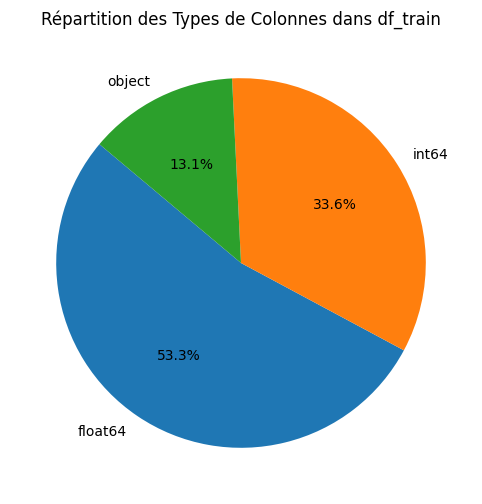

In [5]:
type_counts = df_train.dtypes.value_counts()

# Tracer le diagramme circulaire
plt.figure(figsize=(8, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des Types de Colonnes dans df_train')
plt.show()

Les colonnes sont pour la plupart des valeurs numériques.

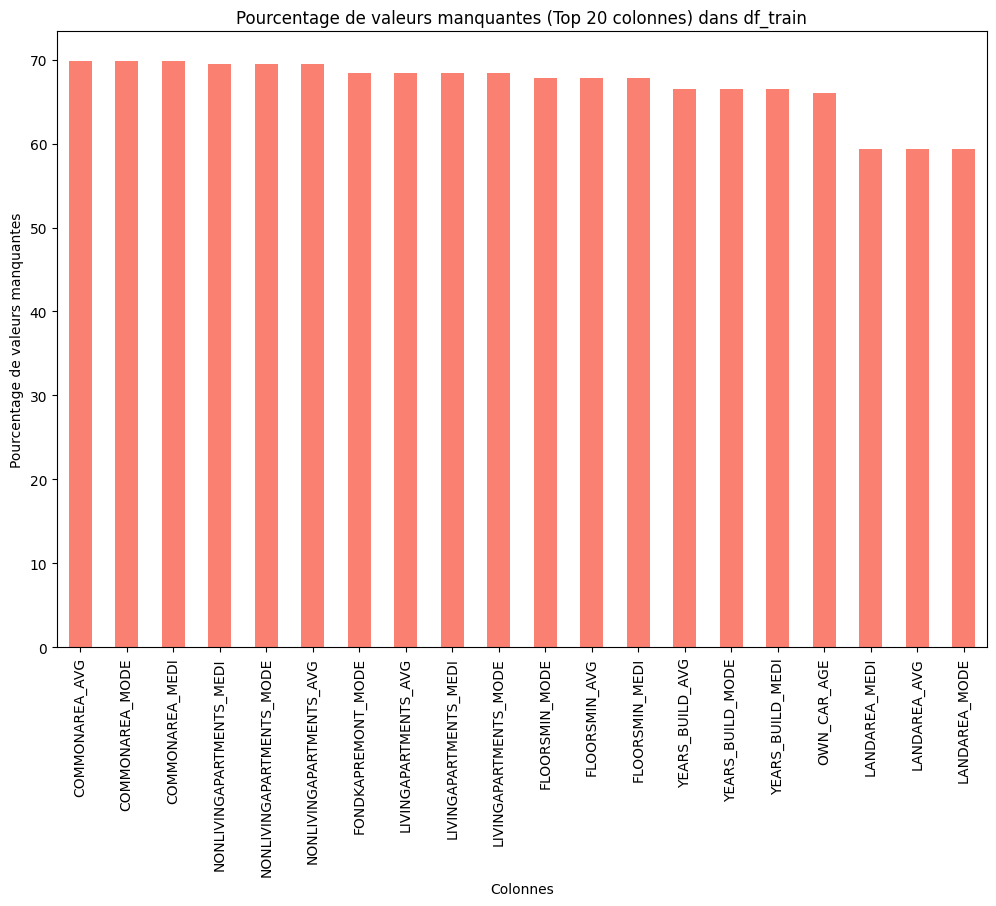

In [6]:
missing_percentage = (df_train.isnull().mean() * 100).sort_values(ascending=False)

# Garder seulement les 20 colonnes avec le plus de valeurs manquantes
top_missing = missing_percentage.head(20)

# Tracer le diagramme en barres
plt.figure(figsize=(12, 8))
top_missing.plot(kind='bar', color='salmon')
plt.title("Pourcentage de valeurs manquantes (Top 20 colonnes) dans df_train")
plt.ylabel("Pourcentage de valeurs manquantes")
plt.xlabel("Colonnes")
plt.show()

On constate qu'il y a des colonnes avec énormément de valeurs manquantes, il faudra donc le prendre de bien les traiter avant d'entrainer notre modèle.

#### Analyse de la colonne TARGET

<Axes: ylabel='Frequency'>

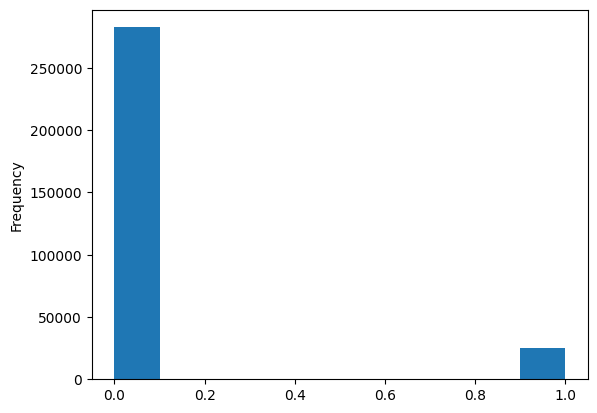

In [7]:
df_train['TARGET'].astype(int).plot.hist()

On constate que la plupart des clients ne sont pas sujet à risque, il faudra prendre cette répartition désiquilibrée en compte lors de l'entrainement de notre modèle.

### Prétraitement et feature engineering

#### Import des librairies

In [8]:
import numpy as np
import pandas as pd
import gc
import time
from contextlib import contextmanager
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Gestionnaire de contexte pour mesurer le temps d'exécution
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

#### Encodage des variables catégorielles

Pour l'encodage des données, j'ai choisi d'utilisé un OneHotEncoder, ce qui augmentera fortement le nombre de colonnes du jeu de données.

In [9]:
def one_hot_encoder(df, nan_as_category=True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

#### Prétraitement des Données de Base

Nous aborderons ici la préparation des données principales en chargeant les fichiers application_train.csv et application_test.csv, puis en appliquant un encodage binaire, un encodage one-hot, et en créant des features dérivées.

In [10]:
def application_train_test(num_rows = None, nan_as_category = False):
    # Read data and merge
    df = pd.read_csv('data/application_train.csv', nrows= num_rows)
    test_df = pd.read_csv('data/application_test.csv', nrows= num_rows)
    print("Train samples: {}, test samples: {}".format(len(df), len(test_df)))
    df = df._append(test_df).reset_index()
    # Optional: Remove 4 applications with XNA CODE_GENDER (train set)
    df = df[df['CODE_GENDER'] != 'XNA']
    
    # Categorical features with Binary encode (0 or 1; two categories)
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
    # Categorical features with One-Hot encode
    df, cat_cols = one_hot_encoder(df, nan_as_category)
    
    # NaN values for DAYS_EMPLOYED: 365.243 -> nan
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    del test_df
    gc.collect()
    return df

Cette fonction combine les données d'entraînement et de test à partir des fichiers CSV `application_train.csv` et `application_test.csv`, effectue un nettoyage et un encodage des variables, et crée de nouvelles variables pour l'analyse ultérieure. 

**Paramètres** :
- **num_rows** *(optionnel)* : Nombre de lignes à lire à partir des fichiers CSV. Si `None`, toutes les lignes sont lues.
- **nan_as_category** : Booléen qui indique si les valeurs manquantes (NaN) doivent être traitées comme une catégorie lors de l'encodage One-Hot.

**Étapes** :

1. **Lecture des fichiers CSV :**
   - Le fichier `application_train.csv` est chargé dans le DataFrame `df`.
   - Le fichier `application_test.csv` est chargé dans le DataFrame `test_df`.
   - Le nombre d'échantillons d'entraînement et de test est affiché.

2. **Concaténation des données :**
   - Les deux DataFrames sont concaténés en un seul, en les empilant verticalement (axis=0).
   - L'index est réinitialisé pour le DataFrame concaténé.

3. **Nettoyage des données :**
   - Les lignes où la valeur de la colonne `CODE_GENDER` est `'XNA'` sont supprimées.
   - La valeur aberrante `365243` dans la colonne `DAYS_EMPLOYED` est remplacée par `NaN`.

4. **Encodage binaire :**
   - Pour les colonnes catégorielles binaires (telles que `CODE_GENDER`, `FLAG_OWN_CAR`, `FLAG_OWN_REALTY`), un encodage numérique est appliqué à l'aide de la méthode `pd.factorize()`, qui attribue un entier unique à chaque catégorie.

5. **Encodage One-Hot :**
   - Les autres colonnes catégorielles sont encodées via la fonction `one_hot_encoder`, transformant les variables catégorielles en colonnes numériques binaires. 
   - Si `nan_as_category=True`, les valeurs manquantes sont également considérées comme une catégorie à part entière.

6. **Création de nouvelles variables :**
   - **`DAYS_EMPLOYED_PERC`** : Le ratio entre les jours travaillés (`DAYS_EMPLOYED`) et l'âge en jours (`DAYS_BIRTH`), pour estimer la proportion de la vie professionnelle par rapport à l'âge du client.
   - **`INCOME_CREDIT_PERC`** : Le ratio entre le revenu total annuel (`AMT_INCOME_TOTAL`) et le montant du crédit demandé (`AMT_CREDIT`).
   - **`INCOME_PER_PERSON`** : Le revenu total par membre de la famille, calculé en divisant le revenu total par le nombre de membres de la famille (`CNT_FAM_MEMBERS`).
   - **`ANNUITY_INCOME_PERC`** : Le ratio entre l'annuité (`AMT_ANNUITY`) et le revenu total, pour estimer la part de l'annuité dans le revenu.
   - **`PAYMENT_RATE`** : Le ratio entre l'annuité (`AMT_ANNUITY`) et le montant du crédit, pour évaluer la capacité de remboursement.

7. **Nettoyage de la mémoire :**
   - Le DataFrame `test_df` est supprimé pour libérer de la mémoire.
   - La fonction `gc.collect()` est appelée pour forcer le ramasse-miettes à libérer les objets inutilisés.

8. **Retour des résultats :**
   - La fonction renvoie le DataFrame `df` contenant les données d'entraînement et de test combinées, avec les variables nettoyées, encodées, et les nouvelles features créées.


#### Prétraitement des Données `bureau` et `bureau_balance`

Cette partie agrège les informations de crédit précédentes et fournit des statistiques pour chaque client.

In [11]:
def bureau_and_balance(num_rows = None, nan_as_category = True):
    bureau = pd.read_csv('data/bureau.csv', nrows = num_rows)
    bb = pd.read_csv('data/bureau_balance.csv', nrows = num_rows)
    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)
    
    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
    del bb, bb_agg
    gc.collect()
    
    # Bureau and bureau_balance numeric features
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }
    # Bureau and bureau_balance categorical features
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']
    
    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
    # Bureau: Active credits - using only numerical aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
    del active, active_agg
    gc.collect()
    # Bureau: Closed credits - using only numerical aggregations
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
    del closed, closed_agg, bureau
    gc.collect()
    return bureau_agg

Cette fonction combine les données provenant de deux fichiers CSV : `bureau.csv` et `bureau_balance.csv`, et effectue diverses opérations d'encodage et d'agrégation. Voici le détail de son fonctionnement :

**Paramètres :**
- **num_rows** *(optionnel)* : Nombre de lignes à lire à partir des fichiers CSV. Si `None`, toutes les lignes seront lues.
- **nan_as_category** : Booléen qui indique si les valeurs manquantes (NaN) doivent être traitées comme une catégorie lors de l'encodage.

**Étapes :**

1. **Lecture des données :**
   - Le fichier `bureau.csv` est chargé dans un DataFrame `bureau`.
   - Le fichier `bureau_balance.csv` est chargé dans un DataFrame `bb`.

2. **Encodage One-Hot :**
   - Les colonnes catégorielles des deux DataFrames sont encodées avec la fonction `one_hot_encoder`, qui effectue un encodage One-Hot, transformant les variables catégorielles en colonnes numériques binaires.
   - Les colonnes catégorielles encodées sont stockées dans `bb_cat` et `bureau_cat`.

3. **Agrégation des données de `bureau_balance` :**
   - Un dictionnaire `bb_aggregations` est créé pour spécifier comment les colonnes doivent être agrégées :
     - `MONTHS_BALANCE` est agrégé avec les fonctions `min`, `max` et `size`.
     - Pour les colonnes catégorielles encodées, la moyenne (`mean`) est calculée.
   - Les données de `bureau_balance` sont ensuite agrégées par la colonne `SK_ID_BUREAU` et les résultats sont stockés dans `bb_agg`.
   - Les noms des colonnes du DataFrame agrégé sont modifiés pour indiquer l'opération d'agrégation (par exemple, `MONTHS_BALANCE_MIN`).

4. **Jointure des données :**
   - Le DataFrame `bureau` est enrichi avec les informations agrégées de `bb_agg`, en effectuant une jointure (`left join`) sur la colonne `SK_ID_BUREAU`.
   - La colonne `SK_ID_BUREAU` est ensuite supprimée car elle n'est plus nécessaire.

5. **Agrégation des crédits actifs et fermés :**
   - Un autre dictionnaire d'agrégation est défini pour les colonnes du DataFrame `bureau`, afin de calculer plusieurs statistiques (par exemple, `min`, `max`, `mean`, `sum`) pour différentes colonnes comme `DAYS_CREDIT`, `AMT_CREDIT_SUM`, etc.
   - Ces agrégations sont effectuées au niveau du client, en groupant les données par la colonne `SK_ID_CURR` (qui identifie le client).

6. **Nettoyage de la mémoire :**
   - Les objets `bb` et `bb_agg` sont supprimés pour libérer de la mémoire.
   - La fonction `gc.collect()` est appelée pour forcer le ramasse-miettes à nettoyer les objets non utilisés.

7. **Retour des résultats :**
   - La fonction renvoie un DataFrame agrégé au niveau du client, contenant des statistiques sur les crédits passés et actuels.

#### Prétraitement des Données `previous_applications`

Ce bloc traite des crédits précédents en calculant des statistiques de crédit, avec des agrégations par client.

In [12]:
def previous_applications(num_rows = None, nan_as_category = True):
    prev = pd.read_csv('data/previous_application.csv', nrows = num_rows)
    prev, cat_cols = one_hot_encoder(prev, nan_as_category= True)
    # Days 365.243 values -> nan
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)
    # Add feature: value ask / value received percentage
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
    # Previous applications numeric features
    num_aggregations = {
        'AMT_ANNUITY': ['min', 'max', 'mean'],
        'AMT_APPLICATION': ['min', 'max', 'mean'],
        'AMT_CREDIT': ['min', 'max', 'mean'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
    }
    # Previous applications categorical features
    cat_aggregations = {}
    for cat in cat_cols:
        cat_aggregations[cat] = ['mean']
    
    prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])
    # Previous Applications: Approved Applications - only numerical features
    approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
    approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
    approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
    prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')
    # Previous Applications: Refused Applications - only numerical features
    refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
    refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
    refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
    prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
    del refused, refused_agg, approved, approved_agg, prev
    gc.collect()
    return prev_agg

Cette fonction traite et agrège les données provenant du fichier `previous_application.csv`, qui contient des informations sur les précédentes demandes de crédit d'un client. Les données sont encodées, nettoyées et agrégées pour créer de nouvelles caractéristiques pouvant être utilisées dans des modèles de machine learning.

**Paramètres** :
- **num_rows** *(optionnel)* : Nombre de lignes à lire à partir du fichier CSV. Si `None`, toutes les lignes seront lues.
- **nan_as_category** : Booléen qui indique si les valeurs manquantes (NaN) doivent être traitées comme une catégorie lors de l'encodage One-Hot.

**Étapes** :

1. **Lecture des données :**
   - Le fichier `previous_application.csv` est chargé dans le DataFrame `prev`, qui contient les données relatives aux précédentes demandes de crédit des clients.

2. **Création d'une nouvelle colonne `APP_CREDIT_PERC` :**
   - La colonne `APP_CREDIT_PERC` est calculée comme le ratio entre le montant demandé lors d'une application de crédit (`AMT_APPLICATION`) et le montant du crédit accordé (`AMT_CREDIT`). Cela permet d'évaluer l'écart entre le crédit demandé et celui accordé.

3. **Encodage One-Hot et remplacement des valeurs aberrantes :**
   - Les colonnes catégorielles sont encodées à l'aide de la fonction `one_hot_encoder`, ce qui transforme les catégories en colonnes binaires.
   - Les valeurs aberrantes `365243` dans les colonnes `DAYS_FIRST_DRAWING` et `DAYS_FIRST_DUE` sont remplacées par `NaN`.

4. **Agrégations numériques et catégorielles :**
   - **Agrégations numériques :** Un dictionnaire `num_aggregations` est créé pour définir les agrégations à effectuer sur les colonnes numériques :
     - `AMT_ANNUITY`, `AMT_APPLICATION`, et `APP_CREDIT_PERC` sont agrégés avec les fonctions `min`, `max` et `mean`.
     - Pour `APP_CREDIT_PERC`, la variance (`var`) est également calculée.
   - **Agrégations catégorielles :** Un dictionnaire `cat_aggregations` est créé pour calculer la moyenne (`mean`) de chaque colonne catégorielle encodée.

5. **Agrégation par client :**
   - Les données sont groupées par la colonne `SK_ID_CURR`, qui représente l'identifiant unique du client. Les agrégations définies dans `num_aggregations` et `cat_aggregations` sont appliquées à chaque client.
   - Les colonnes du DataFrame agrégé sont renommées pour inclure le préfixe `PREV_`, suivi du nom de la colonne originale et de l'opération d'agrégation appliquée (par exemple, `PREV_AMT_ANNUITY_MIN`).

6. **Nettoyage de la mémoire :**
   - Le DataFrame `prev` est supprimé pour libérer de la mémoire.
   - La fonction `gc.collect()` est appelée pour forcer le ramasse-miettes à libérer les objets inutilisés.

7. **Retour des résultats :**
   - La fonction renvoie un DataFrame `prev_agg` qui contient les données agrégées par client, avec des statistiques sur les précédentes demandes de crédit.

#### Prétraitement des Données `POS_CASH_balance`

Pour le suivi des soldes des cartes, ce bloc crée des agrégations qui résument la relation du client avec les cartes de crédit.

In [13]:
def pos_cash(num_rows = None, nan_as_category = True):
    pos = pd.read_csv('data/POS_CASH_balance.csv', nrows = num_rows)
    pos, cat_cols = one_hot_encoder(pos, nan_as_category= True)
    # Features
    aggregations = {
        'MONTHS_BALANCE': ['max', 'mean', 'size'],
        'SK_DPD': ['max', 'mean'],
        'SK_DPD_DEF': ['max', 'mean']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    
    pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])
    # Count pos cash accounts
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()
    del pos
    gc.collect()
    return pos_agg

#### Prétraitement des Données `installments_payments`

Cette section calcule des ratios et des délais de paiement, utiles pour évaluer les comportements de paiement.

In [14]:
def installments_payments(num_rows = None, nan_as_category = True):
    ins = pd.read_csv('data/installments_payments.csv', nrows = num_rows)
    ins, cat_cols = one_hot_encoder(ins, nan_as_category= True)
    # Percentage and difference paid in each installment (amount paid and installment value)
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']
    # Days past due and days before due (no negative values)
    ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
    ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
    ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)
    # Features: Perform aggregations
    aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum'],
        'DBD': ['max', 'mean', 'sum'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])
    # Count installments accounts
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()
    del ins
    gc.collect()
    return ins_agg


#### Prétraitement des Données `credit_card_balance`

In [15]:
def credit_card_balance(num_rows = None, nan_as_category = True):
    cc = pd.read_csv('data/credit_card_balance.csv', nrows = num_rows)
    cc, cat_cols = one_hot_encoder(cc, nan_as_category= True)
    # General aggregations
    cc.drop(['SK_ID_PREV'], axis= 1, inplace = True)
    cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])
    # Count credit card lines
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()
    del cc
    gc.collect()
    return cc_agg

#### Fusionner les Données Préparées

In [16]:
def merge_data(debug = False):
    num_rows = 10000 if debug else None
    df = application_train_test(num_rows)
    with timer("Process bureau and bureau_balance"):
        bureau = bureau_and_balance(num_rows)
        print("Bureau df shape:", bureau.shape)
        df = df.join(bureau, how='left', on='SK_ID_CURR')
        del bureau
        gc.collect()
    with timer("Process previous_applications"):
        prev = previous_applications(num_rows)
        print("Previous applications df shape:", prev.shape)
        df = df.join(prev, how='left', on='SK_ID_CURR')
        del prev
        gc.collect()
    with timer("Process POS-CASH balance"):
        pos = pos_cash(num_rows)
        print("Pos-cash balance df shape:", pos.shape)
        df = df.join(pos, how='left', on='SK_ID_CURR')
        del pos
        gc.collect()
    with timer("Process installments payments"):
        ins = installments_payments(num_rows)
        print("Installments payments df shape:", ins.shape)
        df = df.join(ins, how='left', on='SK_ID_CURR')
        del ins
        gc.collect()
    with timer("Process credit card balance"):
        cc = credit_card_balance(num_rows)
        print("Credit card balance df shape:", cc.shape)
        df = df.join(cc, how='left', on='SK_ID_CURR')
        del cc
        gc.collect()
    
    return df

In [17]:
df = merge_data()

Train samples: 307511, test samples: 48744
Bureau df shape: (305811, 116)
Process bureau and bureau_balance - done in 17s
Previous applications df shape: (338857, 249)
Process previous_applications - done in 22s
Pos-cash balance df shape: (337252, 18)
Process POS-CASH balance - done in 11s
Installments payments df shape: (339587, 26)
Process installments payments - done in 22s
Credit card balance df shape: (103558, 141)
Process credit card balance - done in 14s


#### Gestion des valeurs manquantes

Selon le modèle que l'on choisira, on pourra décider ou non de traiter les valeurs manquantes. Par exemple, pour un XGBoost, il n'y a pas besoin de traiter les valeurs manquantes, ce qui permettra de vraiment savoir quelles colonnes ont vraiment leur importance dans l'entrainement du modèle.

In [18]:
import pandas as pd
from sklearn.impute import SimpleImputer

def handle_missing_values(data, target_column="TARGET", threshold=0.5, imputation_strategy="median"):
    """
    Traite les valeurs manquantes dans un DataFrame :
    - Exclut la colonne TARGET du traitement.
    - Supprime les colonnes avec un pourcentage de valeurs manquantes supérieur au seuil.
    - Impute les colonnes numériques avec la médiane ou la moyenne.
    - Impute les colonnes booléennes avec la valeur la plus fréquente.
    
    Parameters:
        data (pd.DataFrame): Le DataFrame à traiter.
        target_column (str): Le nom de la colonne cible à exclure du traitement.
        threshold (float): Le seuil de pourcentage de valeurs manquantes pour supprimer les colonnes (entre 0 et 1).
        imputation_strategy (str): "median" ou "mean" pour imputer les colonnes numériques.
    
    Returns:
        pd.DataFrame: Le DataFrame avec les valeurs manquantes traitées.
    """
    # Vérifier les entrées
    if imputation_strategy not in ["median", "mean"]:
        raise ValueError("imputation_strategy doit être 'median' ou 'mean'.")
    if target_column not in data.columns:
        raise ValueError(f"La colonne cible '{target_column}' n'existe pas dans le DataFrame.")
    
    # Isoler la colonne TARGET
    target_data = data[target_column]
    data = data.drop(columns=[target_column])

    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # Supprimer les colonnes avec trop de valeurs manquantes
    missing_percentage = data.isnull().mean()
    cols_to_drop = missing_percentage[missing_percentage > threshold].index
    data = data.drop(columns=cols_to_drop)
    print(f"Colonnes supprimées : {list(cols_to_drop)}")
    
    # Séparer les colonnes numériques et booléennes
    num_cols = data.select_dtypes(include=["float64", "int64"]).columns
    bool_cols = data.select_dtypes(include=["bool"]).columns

    # Convertir les colonnes booléennes en type int
    if len(bool_cols) > 0:
        data[bool_cols] = data[bool_cols].astype(int)
    
    # Imputer les colonnes numériques
    num_imputer = SimpleImputer(strategy=imputation_strategy)
    data[num_cols] = num_imputer.fit_transform(data[num_cols])
    
    # Réintégrer la colonne TARGET
    data[target_column] = target_data
    
    return data

## Modélisation

### Création d'un score métier pour l'entrainement des modèles

#### Contexte métier
1. **Déséquilibre des classes** :
   - Vous avez deux classes :
     - Bons clients (classe majoritaire).
     - Mauvais clients (classe minoritaire).
   - Un modèle naïf pourrait privilégier les bons clients en raison de leur prévalence, mais cela conduirait à des erreurs coûteuses pour l'entreprise (faux négatifs).

2. **Coût métier des erreurs** :
   - **Faux négatif (FN)** : Un mauvais client est prédit comme bon. Cela entraîne un **crédit accordé** à une personne qui pourrait ne pas le rembourser, ce qui représente une **perte en capital importante**.
   - **Faux positif (FP)** : Un bon client est prédit comme mauvais. Cela conduit à un **refus de crédit**, ce qui représente un **manque à gagner** (moins grave que FN).
   - Exemple de pondération : **Coût d’un FN = 10 fois le coût d’un FP**.

3. **Optimisation du seuil** :
   - Par défaut, un modèle de classification binaire utilise un seuil de 0.5 pour classer une observation comme 0 ou 1. Mais ce seuil peut ne pas minimiser le coût métier.
   - L'objectif est d’optimiser ce seuil pour minimiser le coût total des erreurs.

---

#### Explication du Score Métier
Le **score métier** permet de mesurer la performance d'un modèle en fonction du **coût total des erreurs** (FN et FP), tout en tenant compte du seuil optimisé. Voici les étapes principales :

1. **Prédiction binaire avec un seuil donné** :
   - Convertir les probabilités prédites $\hat{p}$ en classes binaires $\hat{y}$ selon le seuil choisi :
     $$
     \hat{y} = 
     \begin{cases} 
     1 & \text{si } \hat{p} \geq \text{seuil} \\
     0 & \text{sinon.}
     \end{cases}
     $$

2. **Matrice de confusion** :
   - Calculer les éléments de la matrice de confusion (TP, FP, FN, TN) en comparant les prédictions binaires $\hat{y}$ avec les vraies classes $y$.

3. **Calcul du coût métier** :
   - Le coût total des erreurs est :
     $$
     \text{Coût métier} = (\text{coût FN} \times \text{FN}) + (\text{coût FP} \times \text{FP}).
     $$

4. **Optimisation du seuil** :
   - Tester plusieurs seuils possibles $t \in \text{seuils}$ pour trouver celui qui minimise le coût métier.

5. **Comparaison des modèles** :
   - Utiliser ce score pour comparer les modèles et leurs hyperparamètres.
   - Compléter


In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix, roc_auc_score

def calculate_business_cost(y_true, y_pred_proba, threshold, cost_fn=10, cost_fp=1):
    """
    Calcule le coût métier pour un seuil donné.
    
    Parameters:
        y_true (array): Vraies classes (0 ou 1).
        y_pred_proba (array): Probabilités prédites par le modèle.
        threshold (float): Seuil de classification.
        cost_fn (int): Coût d'un faux négatif.
        cost_fp (int): Coût d'un faux positif.
        
    Returns:
        float: Coût métier.
    """
    # Prédictions binaires selon le seuil
    y_pred = (y_pred_proba >= threshold).astype(int)
    
    # Matrice de confusion
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Calcul du coût
    business_cost = (cost_fn * fn) + (cost_fp * fp)
    return business_cost

def optimize_threshold(y_true, y_pred_proba, thresholds, cost_fn=10, cost_fp=1):
    """
    Optimise le seuil pour minimiser le coût métier.
    
    Parameters:
        y_true (array): Vraies classes (0 ou 1).
        y_pred_proba (array): Probabilités prédites par le modèle.
        thresholds (array): Liste de seuils à tester.
        cost_fn (int): Coût d'un faux négatif.
        cost_fp (int): Coût d'un faux positif.
        
    Returns:
        dict: Meilleur seuil et coût associé.
    """
    best_threshold = None
    min_cost = float('inf')
    
    for t in thresholds:
        cost = calculate_business_cost(y_true, y_pred_proba, t, cost_fn, cost_fp)
        if cost < min_cost:
            min_cost = cost
            best_threshold = t
            
    return {"best_threshold": best_threshold, "min_cost": min_cost}

from sklearn.metrics import make_scorer

def business_cost_scorer(estimator, X, y, cost_fn=10, cost_fp=1, thresholds=np.linspace(0.1, 0.9, 100)):
    """
    Fonction de scoring métier pour GridSearchCV.
    
    Parameters:
        estimator: Modèle scikit-learn entraîné.
        X (array): Features.
        y (array): Labels réels.
        cost_fn (int): Coût d'un faux négatif.
        cost_fp (int): Coût d'un faux positif.
        thresholds (array): Liste de seuils à tester pour optimiser le coût.
        
    Returns:
        float: Le coût métier minimal obtenu en optimisant le seuil.
    """
    # Prédire les probabilités
    y_pred_proba = estimator.predict_proba(X)[:, 1]
    
    # Optimiser le seuil pour minimiser le coût métier
    result = optimize_threshold(y, y_pred_proba, thresholds, cost_fn=cost_fn, cost_fp=cost_fp)
    
    # Retourner le coût minimal
    return -result["min_cost"]

## Entrainement et suivi des modèles

### Création du serveur MLFlow
Pour créer un serveur MLFlow, on utilise cette ligne de code
mlflow server --backend-store-uri sqlite:///mlflow.db --default-artifact-root ./mlruns --host 0.0.0.0 --port 5000

### Gestion des valeurs manquantes et séparation en jeu d'entrainement et de test

In [21]:
from sklearn.model_selection import train_test_split

df = handle_missing_values(df)

train_df = df[df['TARGET'].notnull()]
test_df = df[df['TARGET'].isnull()]

test_df.to_csv('streamlit/test_df.csv', index=False,sep=';')

X = train_df.drop(columns=['TARGET'])
y = train_df['TARGET']

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Suppression des colonnes non prédictives
columns_to_drop = ['index', 'SK_ID_CURR']
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

sample_data = test_df.iloc[0]
sample_data.to_csv('sample_data.csv', index=False)

Colonnes supprimées : []


### Modèle de base
Nous allons utiliser un modèle de référence pour comparer avec nos modèles plus complexes

In [22]:
from sklearn.dummy import DummyClassifier
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score

mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("Home Credit Default Risk")

# Entraînement et évaluation du modèle de référence
with mlflow.start_run(run_name="baseline_model"):
    print("Training Baseline Model...")
    
    # Création et entraînement du modèle de référence
    baseline_model = DummyClassifier(strategy='most_frequent')
    baseline_model.fit(X_train, y_train)
    
    # Prédictions
    baseline_pred = baseline_model.predict(X_test)
    baseline_pred_proba = baseline_model.predict_proba(X_test)[:, 1]
    
    # Calcul des métriques
    baseline_accuracy = accuracy_score(y_test, baseline_pred)
    baseline_auc = roc_auc_score(y_test, baseline_pred_proba)
    baseline_cm = confusion_matrix(y_test, baseline_pred)
    
    # Log des métriques dans MLflow
    mlflow.log_param("model_type", "DummyClassifier")
    mlflow.log_param("strategy", "most_frequent")
    mlflow.log_metric("baseline_accuracy", baseline_accuracy)
    mlflow.log_metric("baseline_auc", baseline_auc)
    
    print(f"Baseline Model Metrics:")
    print(f"Accuracy: {baseline_accuracy:.4f}")
    print(f"AUC: {baseline_auc:.4f}")
    print("Confusion Matrix:")
    print(baseline_cm)
    print("\n" + "="*50 + "\n")

2025/01/03 16:23:35 INFO mlflow.tracking.fluent: Experiment with name 'Home Credit Default Risk' does not exist. Creating a new experiment.


Training Baseline Model...
Baseline Model Metrics:
Accuracy: 0.9184
AUC: 0.5000
Confusion Matrix:
[[56481     0]
 [ 5021     0]]


🏃 View run baseline_model at: http://localhost:5000/#/experiments/1/runs/e6e7a80b226b44a1bb3d80f64f3a61f4
🧪 View experiment at: http://localhost:5000/#/experiments/1


### Régression logistique

Nous allons utiliser une régression logistique comme premier modèle. Nous procéderons donc de la manière suivante :
- Démarrer le tracking MLFlow
- Entrainer le modèle, calculer les scores et enregistrer les scores et le modèle via MLFlow

Successfully registered model 'sk-learn-log-reg-model'.
2025/01/03 16:24:41 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-log-reg-model, version 1
Created version '1' of model 'sk-learn-log-reg-model'.
2025/01/03 16:24:41 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-log-reg-model, version 2


AUC: 0.5562531068279184
Best Threshold: 0.10898989898989898
Min Business Cost: 47184
Accuracy: 0.5775747130174629
Temps d'entraînement: 19.76 secondes

Top 5 variables les plus importantes:
                    Feature   Coefficient
213    BURO_DAYS_CREDIT_VAR -9.829577e-07
281  CLOSED_DAYS_CREDIT_VAR -9.445326e-07
7           AMT_GOODS_PRICE -7.321593e-07
5                AMT_CREDIT -6.983733e-07
4          AMT_INCOME_TOTAL -4.704857e-07
🏃 View run logistic_regression at: http://localhost:5000/#/experiments/1/runs/b86e5ad8153342cd85da8de1ff07c541
🧪 View experiment at: http://localhost:5000/#/experiments/1


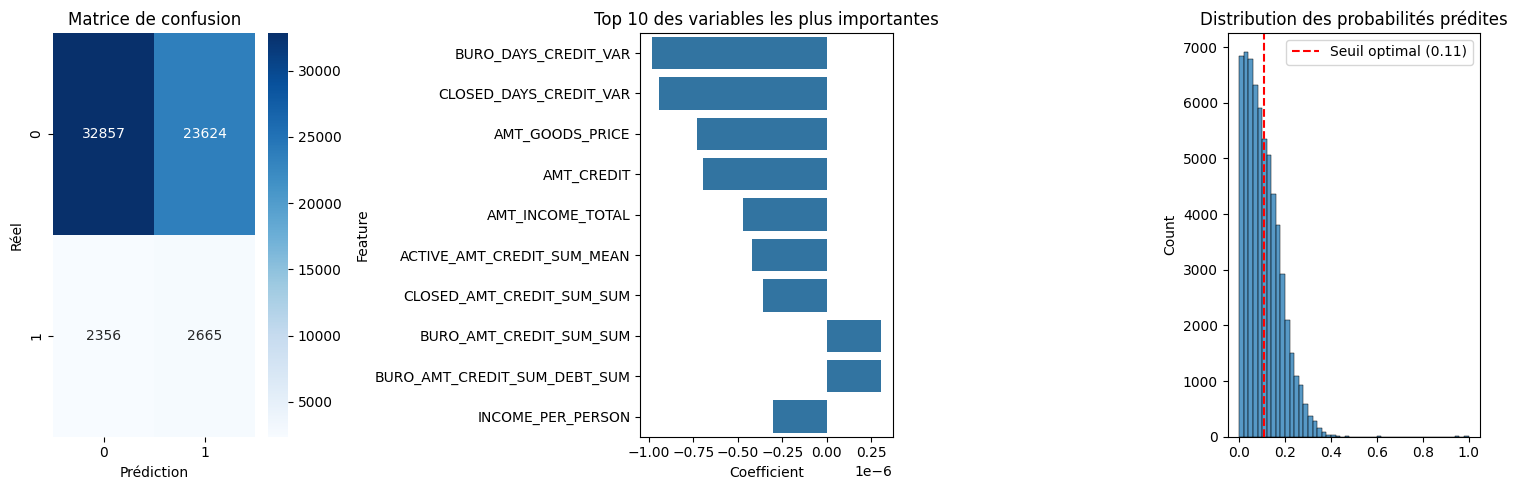

In [23]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature
from mlflow.tracking import MlflowClient
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Entraîner le modèle
with mlflow.start_run(run_name="logistic_regression"):
    # Mesurer le temps de calcul
    start_time = time.time()
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Calculer le temps d'entraînement
    training_time = time.time() - start_time
    
    # Récupérer les coefficients des variables
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Coefficient': model.coef_[0]
    })
    feature_importance = feature_importance.sort_values('Coefficient', key=abs, ascending=False)

    # Prédire les probabilités sur l'ensemble de test
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Optimiser le seuil pour le score métier
    thresholds = np.linspace(0.01, 0.99, 100)
    result = optimize_threshold(y_test, y_pred_proba, thresholds, cost_fn=10, cost_fp=1)
    best_threshold = result["best_threshold"]
    min_cost = result["min_cost"]

    # Recalculer les prédictions binaires avec le meilleur seuil
    y_pred_optimized = (y_pred_proba >= best_threshold).astype(int)
    signature = infer_signature(X_test, y_pred_optimized)

    # Calculer des métriques supplémentaires avec les nouvelles prédictions
    auc_score = roc_auc_score(y_test, y_pred_optimized)
    cm = confusion_matrix(y_test, y_pred_optimized)
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tn + fp + fn + tp)

    # Visualisation des erreurs
    plt.figure(figsize=(15, 5))
    
    # 1. Matrice de confusion
    plt.subplot(131)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matrice de confusion')
    plt.xlabel('Prédiction')
    plt.ylabel('Réel')
    
    # 2. Top 10 des coefficients les plus importants
    plt.subplot(132)
    sns.barplot(data=feature_importance.head(10), x='Coefficient', y='Feature')
    plt.title('Top 10 des variables les plus importantes')
    plt.tight_layout()
    
    # 3. Distribution des probabilités prédites
    plt.subplot(133)
    sns.histplot(y_pred_proba, bins=50)
    plt.axvline(best_threshold, color='r', linestyle='--', label=f'Seuil optimal ({best_threshold:.2f})')
    plt.title('Distribution des probabilités prédites')
    plt.legend()
    
    plt.tight_layout()
    
    # Sauvegarder les visualisations
    plt.savefig('model_analysis.png')
    
    # Log des métriques et du modèle dans MLflow
    mlflow.log_param("model_type", "Logistic Regression")
    mlflow.log_metric("AUC", auc_score)
    mlflow.log_metric("Best Threshold", best_threshold)
    mlflow.log_metric("Min Business Cost", min_cost)
    mlflow.log_metric("Accuracy", accuracy)
    mlflow.log_metric("False Positives", fp)
    mlflow.log_metric("False Negatives", fn)
    mlflow.log_metric("Training Time", training_time)
    
    # Log des artifacts
    mlflow.log_artifact("model_analysis.png")
    
    # Log du DataFrame des coefficients
    feature_importance.to_csv('feature_importance.csv', index=False)
    mlflow.log_artifact("feature_importance.csv")

    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="model",
        signature=signature,
        registered_model_name="sk-learn-log-reg-model",
    )

    print(f"AUC: {auc_score}")
    print(f"Best Threshold: {best_threshold}")
    print(f"Min Business Cost: {min_cost}")
    print(f"Accuracy: {accuracy}")
    print(f"Temps d'entraînement: {training_time:.2f} secondes")
    print("\nTop 5 variables les plus importantes:")
    print(feature_importance.head().to_string())

    client = MlflowClient()

    try:
        client.create_registered_model("sk-learn-log-reg-model")
    except mlflow.exceptions.MlflowException:
        pass
    
    run_id = mlflow.active_run().info.run_id

    result = client.create_model_version(
        name="sk-learn-log-reg-model",
        source=f"mlruns/1/{run_id}/artifacts/model",
        run_id=run_id,
    )
    client.transition_model_version_stage(
        name="sk-learn-log-reg-model",
        version=result.version,
        stage="Staging",
        archive_existing_versions=False,
    )

### XGBoost

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, make_scorer
import xgboost as xgb
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature
from mlflow.tracking import MlflowClient
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

business_scorer = make_scorer(business_cost_scorer, needs_proba=True, cost_fn=10, cost_fp=1)

# Paramètres pour RandomizedSearch
param_dist = {
    'n_estimators': [100, 300, 500, 700],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6, 8],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0.1, 1.0, 5.0]
}

# Initialiser MLflow
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("Home Credit Default Risk")

with mlflow.start_run(run_name="xgboost_model"):
    # Mesurer le temps de calcul
    start_time = time.time()
    
    print("Training XGBoost with RandomizedSearch...")

    xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', tree_method='hist', device="cuda")
    
    # RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=xgb_clf,
        param_distributions=param_dist,
        n_iter=10,
        scoring=business_scorer,
        cv=3,
        verbose=2,
        random_state=42
    )
    
    # Entraîner le RandomizedSearch
    random_search.fit(X_train, y_train)
    
    # Calculer le temps d'entraînement
    training_time = time.time() - start_time
    
    # Meilleur modèle
    best_model = random_search.best_estimator_
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    
    # Récupérer l'importance des variables
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': best_model.feature_importances_
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False)
    
    # Optimiser le seuil
    thresholds = np.linspace(0.01, 0.99, 100)
    result = optimize_threshold(y_test, y_pred_proba, thresholds, cost_fn=10, cost_fp=1)
    best_threshold = result["best_threshold"]
    min_cost = result["min_cost"]
    
    # Prédictions avec le meilleur seuil
    y_pred_optimized = (y_pred_proba >= best_threshold).astype(int)
    signature = infer_signature(X_test, y_pred_optimized)
    
    # Calculer des métriques
    auc_score = roc_auc_score(y_test, y_pred_optimized)
    cm = confusion_matrix(y_test, y_pred_optimized)
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tn + fp + fn + tp)
    
    # Visualisations
    plt.figure(figsize=(15, 5))
    
    # 1. Matrice de confusion
    plt.subplot(131)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matrice de confusion')
    plt.xlabel('Prédiction')
    plt.ylabel('Réel')
    
    # 2. Top 10 des variables les plus importantes
    plt.subplot(132)
    sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature')
    plt.title('Top 10 des variables les plus importantes')
    
    # 3. Distribution des probabilités prédites
    plt.subplot(133)
    sns.histplot(y_pred_proba, bins=50)
    plt.axvline(best_threshold, color='r', linestyle='--', label=f'Seuil optimal ({best_threshold:.2f})')
    plt.title('Distribution des probabilités prédites')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('model_analysis.png')
    
    # Log des hyperparamètres, métriques et du modèle dans MLflow
    mlflow.log_params(random_search.best_params_)
    mlflow.log_metric("AUC", auc_score)
    mlflow.log_metric("Best Threshold", best_threshold)
    mlflow.log_metric("Min Business Cost", min_cost)
    mlflow.log_metric("Accuracy", accuracy)
    mlflow.log_metric("False Positives", fp)
    mlflow.log_metric("False Negatives", fn)
    mlflow.log_metric("Training Time", training_time)
    
    # Log des artifacts
    mlflow.log_artifact("model_analysis.png")
    
    # Log du DataFrame des importances des variables
    feature_importance.to_csv('feature_importance.csv', index=False)
    mlflow.log_artifact("feature_importance.csv")

    mlflow.sklearn.log_model(
        sk_model=best_model,
        artifact_path="model",
        signature=signature,
        registered_model_name="sk-learn-xgboost-model",
    )

    print("\nRésultats de l'entraînement :")
    print(f"Meilleurs paramètres : {random_search.best_params_}")
    print(f"AUC: {auc_score:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Best Threshold: {best_threshold:.4f}")
    print(f"Min Business Cost: {min_cost:.4f}")
    print(f"Temps d'entraînement: {training_time:.2f} secondes")
    print("\nTop 5 variables les plus importantes:")
    print(feature_importance.head().to_string())

    client = MlflowClient()

    try:
        client.create_registered_model("sk-learn-xgboost-model")
    except mlflow.exceptions.MlflowException:
        pass
    
    run_id = mlflow.active_run().info.run_id

    result = client.create_model_version(
        name="sk-learn-xgboost-model",
        source=f"mlruns/1/{run_id}/artifacts/model",
        run_id=run_id,
    )
    client.transition_model_version_stage(
        name="sk-learn-xgboost-model",
        version=result.version,
        stage="Staging",
        archive_existing_versions=False,
    )

Training XGBoost with RandomizedSearch...
🏃 View run xgboost_model at: http://localhost:5000/#/experiments/1/runs/26465edb5a6b44fa84363c63d417f298
🧪 View experiment at: http://localhost:5000/#/experiments/1


AttributeError: 'super' object has no attribute '__sklearn_tags__'

### RandomForest

In [25]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, make_scorer
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature
from mlflow.tracking import MlflowClient
import time
import matplotlib.pyplot as plt
import seaborn as sns

business_scorer = make_scorer(business_cost_scorer, needs_proba=True, cost_fn=10, cost_fp=1)

# Paramètres pour RandomizedSearch
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialiser MLflow
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("Home Credit Default Risk")

with mlflow.start_run(run_name="random_forest_model"):
    # Mesurer le temps de calcul
    start_time = time.time()
    
    print("Training Random Forest with RandomizedSearch...")
    rf_clf = RandomForestClassifier(random_state=42)
    random_search = RandomizedSearchCV(
        estimator=rf_clf,
        param_distributions=param_dist,
        n_iter=10,  # Nombre d'itérations pour RandomizedSearch
        scoring=business_scorer,
        cv=3,
        verbose=2,
        random_state=42
    )
    
    # Entraîner le RandomizedSearch
    random_search.fit(X_train, y_train)
    
    # Calculer le temps d'entraînement
    training_time = time.time() - start_time
    
    # Meilleur modèle
    best_model = random_search.best_estimator_
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    
    # Récupérer l'importance des variables
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': best_model.feature_importances_
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False)
    
    # Optimiser le seuil
    thresholds = np.linspace(0.01, 0.99, 100)
    result = optimize_threshold(y_test, y_pred_proba, thresholds, cost_fn=10, cost_fp=1)
    best_threshold = result["best_threshold"]
    min_cost = result["min_cost"]
    
    # Prédictions avec le meilleur seuil
    y_pred_optimized = (y_pred_proba >= best_threshold).astype(int)
    signature = infer_signature(X_test, y_pred_optimized)
    
    # Calculer des métriques
    auc_score = roc_auc_score(y_test, y_pred_optimized)
    cm = confusion_matrix(y_test, y_pred_optimized)
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tn + fp + fn + tp)
    
    # Visualisations
    plt.figure(figsize=(20, 5))
    
    # 1. Matrice de confusion
    plt.subplot(141)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matrice de confusion')
    plt.xlabel('Prédiction')
    plt.ylabel('Réel')
    
    # 2. Top 10 des variables les plus importantes
    plt.subplot(142)
    sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature')
    plt.title('Top 10 des variables les plus importantes')
    
    # 3. Distribution des probabilités prédites
    plt.subplot(143)
    sns.histplot(y_pred_proba, bins=50)
    plt.axvline(best_threshold, color='r', linestyle='--', label=f'Seuil optimal ({best_threshold:.2f})')
    plt.title('Distribution des probabilités prédites')
    plt.legend()
    
    # 4. Performance selon nombre d'arbres
    plt.subplot(144)
    results = pd.DataFrame(random_search.cv_results_)
    sns.boxplot(data=results, x='param_n_estimators', y='mean_test_score')
    plt.title('Scores selon n_estimators')
    plt.xlabel('Nombre d\'arbres')
    plt.ylabel('Score')
    
    plt.tight_layout()
    plt.savefig('model_analysis.png')
    
    # Log des hyperparamètres, métriques et du modèle dans MLflow
    mlflow.log_params(random_search.best_params_)
    mlflow.log_metric("AUC", auc_score)
    mlflow.log_metric("Best Threshold", best_threshold)
    mlflow.log_metric("Min Business Cost", min_cost)
    mlflow.log_metric("Accuracy", accuracy)
    mlflow.log_metric("False Positives", fp)
    mlflow.log_metric("False Negatives", fn)
    mlflow.log_metric("Training Time", training_time)
    
    # Log des artifacts
    mlflow.log_artifact("model_analysis.png")
    
    # Log du DataFrame des importances des variables
    feature_importance.to_csv('feature_importance.csv', index=False)
    mlflow.log_artifact("feature_importance.csv")

    mlflow.sklearn.log_model(
        sk_model=best_model,
        artifact_path="model",
        signature=signature,
        registered_model_name="sk-learn-random-forest-model",
    )

    print("\nRésultats de l'entraînement :")
    print(f"Meilleurs paramètres : {random_search.best_params_}")
    print(f"AUC: {auc_score:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Best Threshold: {best_threshold:.4f}")
    print(f"Min Business Cost: {min_cost:.4f}")
    print(f"Temps d'entraînement: {training_time:.2f} secondes")
    print("\nTop 5 variables les plus importantes:")
    print(feature_importance.head().to_string())

    client = MlflowClient()

    try:
        client.create_registered_model("sk-learn-random-forest-model")
    except mlflow.exceptions.MlflowException:
        pass
    
    run_id = mlflow.active_run().info.run_id

    result = client.create_model_version(
        name="sk-learn-random-forest-model",
        source=f"mlruns/1/{run_id}/artifacts/model",
        run_id=run_id,
    )
    client.transition_model_version_stage(
        name="sk-learn-random-forest-model",
        version=result.version,
        stage="Staging",
        archive_existing_versions=False,
    )

Training Random Forest with RandomizedSearch...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=23.6min


2025/01/03 15:00:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run random_forest_model at: http://localhost:5000/#/experiments/1/runs/a720b5fec2304c1a9d3f5edf2a14b5e8.
2025/01/03 15:00:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.


KeyboardInterrupt: 

## Features importance

### Global

In [32]:
import matplotlib.pyplot as plt
import shap
from mlflow.tracking import MlflowClient
import mlflow.pyfunc

# Initialisez le client MLflow
mlflow.set_tracking_uri("http://localhost:5000")
client = MlflowClient()

# Nom du modèle enregistré
registered_model_name = "sk-learn-xgboost-model"

# Charger le modèle
model_version = client.get_latest_versions(name=registered_model_name, stages=["Staging"])[0].version

# URI du modèle
model_uri = f"models:/{registered_model_name}/{model_version}"

# Charger le modèle
xgb = mlflow.sklearn.load_model(model_uri)

# Importance des features avec XGBoost
xgb.plot_importance(best_model, importance_type='weight')
plt.title("Feature Importance (Weight)")
plt.show()

xgb.plot_importance(best_model, importance_type='gain')
plt.title("Feature Importance (Gain)")
plt.show()

xgb.plot_importance(best_model, importance_type='cover')
plt.title("Feature Importance (Cover)")
plt.show()

# Importance globale avec SHAP
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_train)

# Summary plot global
shap.summary_plot(shap_values, X_train)

IndexError: list index out of range

### Mise en production

In [ ]:
from mlflow.tracking import MlflowClient

mlflow.set_tracking_uri("http://localhost:5000")
client = MlflowClient()

client.transition_model_version_stage(
    name="sk-learn-xgboost-model",
    version=client.get_latest_versions("sk-learn-xgboost-model", stages=["Staging"])[0].version,
    stage="Production",
    archive_existing_versions=False,
)

<ModelVersion: aliases=[], creation_timestamp=1735910774955, current_stage='Production', description='', last_updated_timestamp=1735916342607, name='sk-learn-xgboost-model', run_id='3f10c7d32bdb44fab30d57f749e26c06', run_link='', source='mlruns/1/3f10c7d32bdb44fab30d57f749e26c06/artifacts/model', status='READY', status_message='', tags={}, user_id='', version='2'>

#### Test du serving MLFlow

Pour démarrrer le serveur du modèle, j'ai utiliser la commande mlflow models serve -m file:... -p 5001 en précisant le dossier d'enregistrement de mon modèle.

On peut ensuite envoyer des requêtes POST à ce serveur afin d'effectuer des prédictions sur des données qu'on lui envoie, on peut donc ici se servir des données de "test" qui ne disposent pas de TARGET afin de tester le serving.

In [ ]:
import requests
import json

input_data = test_df.iloc[[1]]

# Préparer les données pour la requête en format 'dataframe_split'
request_data = {
    "dataframe_split": input_data.to_dict(orient="split")
}

# Adresse de votre serveur MLflow
url = "http://127.0.0.1:5001/invocations"

# Envoyer la requête POST
response = requests.post(
    url,
    headers={"Content-Type": "application/json"},
    data=json.dumps(request_data)
)

# Afficher la réponse
if response.status_code == 200:
    print("Prédiction :", response.json())
else:
    print(f"Erreur {response.status_code} : {response.text}")

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))